In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Conv2D, Dense, Flatten, MaxPooling2D, Dropout, BatchNormalization

In [ ]:
from keras.datasets import cifar10

In [ ]:
labels = {0:'airplane',
1:'automobile',
2:'bird',
3:'cat',
4:'deer',
5:'dog',
6:'frog',
7:'horse',
8:'ship',
9:'truck'}

In [ ]:
(xtrain,ytrain), (xtest, ytest) = cifar10.load_data()

In [ ]:
ytrain

In [ ]:
xtrain.shape

In [32]:
ytest.shape

(10000, 1)

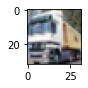

In [14]:
plt.figure(figsize=(1,1))
plt.imshow(xtrain[1,:,:,:])

In [17]:
xtrain[0].shape

(32, 32, 3)

In [15]:
ytrain[1]

array([9], dtype=uint8)

#### Preprocessing

In [65]:
xtrain = xtrain.astype('float32')/255
xtest = xtest.astype('float32')/255

In [58]:
xtrain[0]

array([[[0.23137255, 0.24313726, 0.24705882],
        [0.16862746, 0.18039216, 0.1764706 ],
        [0.19607843, 0.1882353 , 0.16862746],
        ...,
        [0.61960787, 0.5176471 , 0.42352942],
        [0.59607846, 0.49019608, 0.4       ],
        [0.5803922 , 0.4862745 , 0.40392157]],

       [[0.0627451 , 0.07843138, 0.07843138],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509805, 0.21568628],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117648, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215687, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941177, 0.19607843],
        [0.47058824, 0.32941177, 0.19607843],
        [0.42745098, 0.28627452, 0.16470589]],

       ...,

       [[0.8156863 , 0.6666667 , 0.3764706 ],
        [0.7882353 , 0.6       , 0.13333334],
        [0.7764706 , 0

In [59]:
from keras.utils import np_utils

In [64]:
ytrain = np_utils.to_categorical(ytrain)
ytest = np_utils.to_categorical(ytest)

In [66]:
ytrain

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

#### Creating CNN Model

In [67]:
num_classes = 10

In [68]:
model = Sequential()
model.add(Conv2D(32, (3,3), padding='same',activation='relu', input_shape=xtrain[0].shape))
model.add(Dropout(0.25))
model.add(Conv2D(32, (3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation = 'softmax'))

In [69]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               4194816   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)              

In [70]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [71]:
h = model.fit(xtrain, ytrain, epochs=10, batch_size=32, validation_data=(xtest, ytest))

Epoch 1/10
1563/1563 [==============================] - 268s 168ms/step - loss: 1.7659 - accuracy: 0.3596 - val_loss: 1.1694 - val_accuracy: 0.5846
Epoch 2/10
1563/1563 [==============================] - 238s 152ms/step - loss: 1.1952 - accuracy: 0.5734 - val_loss: 1.0363 - val_accuracy: 0.6365
Epoch 3/10
1563/1563 [==============================] - 206s 132ms/step - loss: 1.0240 - accuracy: 0.6370 - val_loss: 0.9936 - val_accuracy: 0.6572
Epoch 4/10
1563/1563 [==============================] - 215s 138ms/step - loss: 0.9207 - accuracy: 0.6714 - val_loss: 0.9098 - val_accuracy: 0.6839
Epoch 5/10
1563/1563 [==============================] - 216s 139ms/step - loss: 0.8414 - accuracy: 0.7035 - val_loss: 0.8892 - val_accuracy: 0.6890
Epoch 6/10
1563/1563 [==============================] - 245s 157ms/step - loss: 0.7478 - accuracy: 0.7343 - val_loss: 0.9063 - val_accuracy: 0.6904
Epoch 7/10
1563/1563 [==============================] - 243s 155ms/step - loss: 0.6919 - accuracy: 0.7529 - val_

In [72]:
h

In [73]:
h.history

{'loss': [1.5208301544189453,
  1.1668773889541626,
  1.0214786529541016,
  0.9258753657341003,
  0.8450788855552673,
  0.7684676647186279,
  0.7057376503944397,
  0.6460729837417603,
  0.593511700630188,
  0.553700864315033],
 'accuracy': [0.4524399936199188,
  0.5860000252723694,
  0.6391800045967102,
  0.6729599833488464,
  0.7017800211906433,
  0.7283999919891357,
  0.7485600113868713,
  0.7704799771308899,
  0.7874600291252136,
  0.8022400140762329],
 'val_loss': [1.1694120168685913,
  1.0362765789031982,
  0.9935512542724609,
  0.909801185131073,
  0.8892127871513367,
  0.9063231348991394,
  0.927330493927002,
  0.9395887851715088,
  0.9519652128219604,
  0.9675147533416748],
 'val_accuracy': [0.5845999717712402,
  0.6365000009536743,
  0.6571999788284302,
  0.683899998664856,
  0.6890000104904175,
  0.6904000043869019,
  0.6880999803543091,
  0.6937000155448914,
  0.6947000026702881,
  0.695900022983551]}

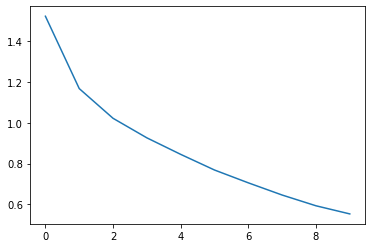

In [76]:
plt.plot(h.history['loss'])

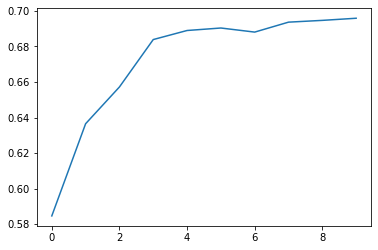

In [74]:
plt.plot(h.history['val_accuracy'])

In [77]:
model.save('better_model.h5')

In [78]:
model.evaluate(xtest,ytest)

313/313 [==============================] - 7s 23ms/step - loss: 0.9675 - accuracy: 0.6959


[0.9675147533416748, 0.695900022983551]

In [79]:
# This is better

In [80]:
im = plt.imread('truck.jfif')

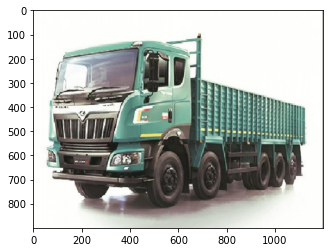

In [81]:
plt.imshow(im)

In [82]:
im.shape

(900, 1200, 3)

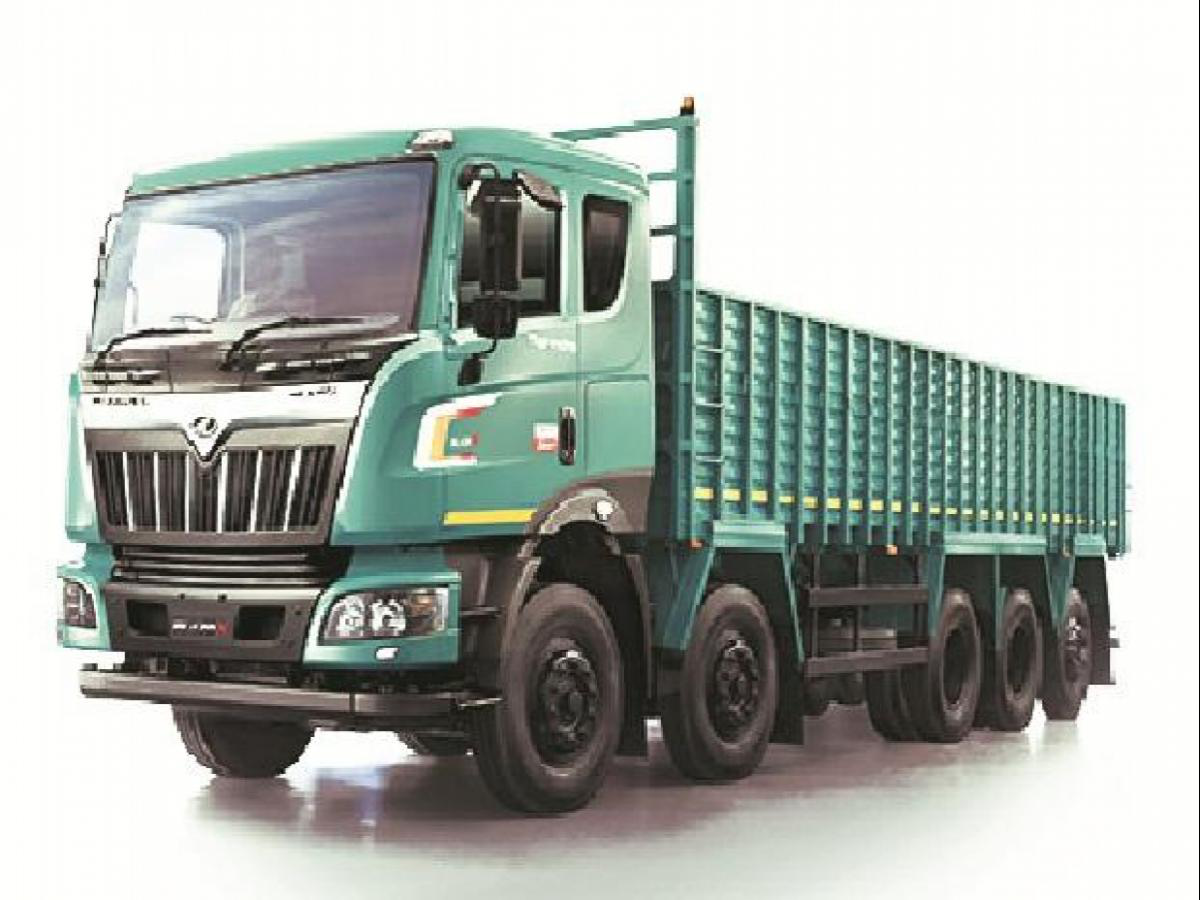

In [83]:
from PIL import Image
im = Image.open('truck.jfif')
im

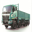

In [84]:
im = im.resize((32,32))
im

In [85]:
im.size

(32, 32)

In [86]:
im = np.expand_dims(im,axis=0)
im.shape

(1, 32, 32, 3)

In [87]:
type(im)

numpy.ndarray

In [ ]:
model.predict_classes([im])

In [90]:
pred = model.predict([im])
pred

array([[2.6920589e-31, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00]], dtype=float32)

In [93]:
pred[0]

array([2.6920589e-31, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 1.0000000e+00], dtype=float32)

In [94]:
pred[0].argmax()

9

In [97]:
labels

{0: 'airplane',
 1: 'automobile',
 2: 'bird',
 3: 'cat',
 4: 'deer',
 5: 'dog',
 6: 'frog',
 7: 'horse',
 8: 'ship',
 9: 'truck'}

In [98]:
type(labels)

dict

In [96]:
labels.get(pred[0].argmax())

'truck'